Building prefix dict from C:\Users\user\20191030\dictionary\dict.txt.big.txt ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.u76bb0d02c383b3b3cb75d8a79b93be90.cache


標題：
網址：/url?q=https://petbird.tw/article5392.html&sa=U&ved=2ahUKEwj3-cXVusPlAhVwwosBHRecDCgQwW4wAHoECA0QAg&usg=AOvVaw0DL9O4Tdwxq3bF3-y5Gw3g
標題：7個理由不養比熊犬，看完你還會養嗎？ - 每日頭條https://kknews.cc › 寵物
網址：/url?q=https://kknews.cc/zh-tw/pet/nq39op5.html&sa=U&ved=2ahUKEwj3-cXVusPlAhVwwosBHRecDCgQFjATegQIBRAB&usg=AOvVaw3atyGYCP60i4Grpc-KaiNu
標題：比熊犬的8大缺點，看完你還會養嗎？ - 每日頭條https://kknews.cc › 寵物
網址：/url?q=https://kknews.cc/zh-tw/pet/aavo64x.html&sa=U&ved=2ahUKEwj3-cXVusPlAhVwwosBHRecDCgQFjAUegQIARAB&usg=AOvVaw1qKMdSqwlKfFfU1yV2CSbM
標題：比熊犬 - 寵寵微積https://34c.cc › yan › SearchType=比熊犬
網址：/url?q=https://34c.cc/yan.php%3Fyan%3DRegPetBBS%26Search%3DY%26SearchType%3D%25A4%25F1%25BA%25B5%25A4%25FC%26StyleId%3D1&sa=U&ved=2ahUKEwj3-cXVusPlAhVwwosBHRecDCgQFjAVegQICBAB&usg=AOvVaw1U0_Q3jEr4bzb4rkPGQDre
標題：比熊犬- 維基百科，自由的百科全書 - Wikipediahttps://zh.wikipedia.org › zh-tw › 比熊犬
網址：/url?q=https://zh.wikipedia.org/zh-tw/%25E6%25AF%2594%25E7%2586%258A%25E7%258A%25AC&sa=U&ved=2ahUKEwj3-cXVusPlAhVwwosBHRecDCgQFjAWegQICRAB&usg=A

Loading model cost 1.014 seconds.
Prefix dict has been built succesfully.


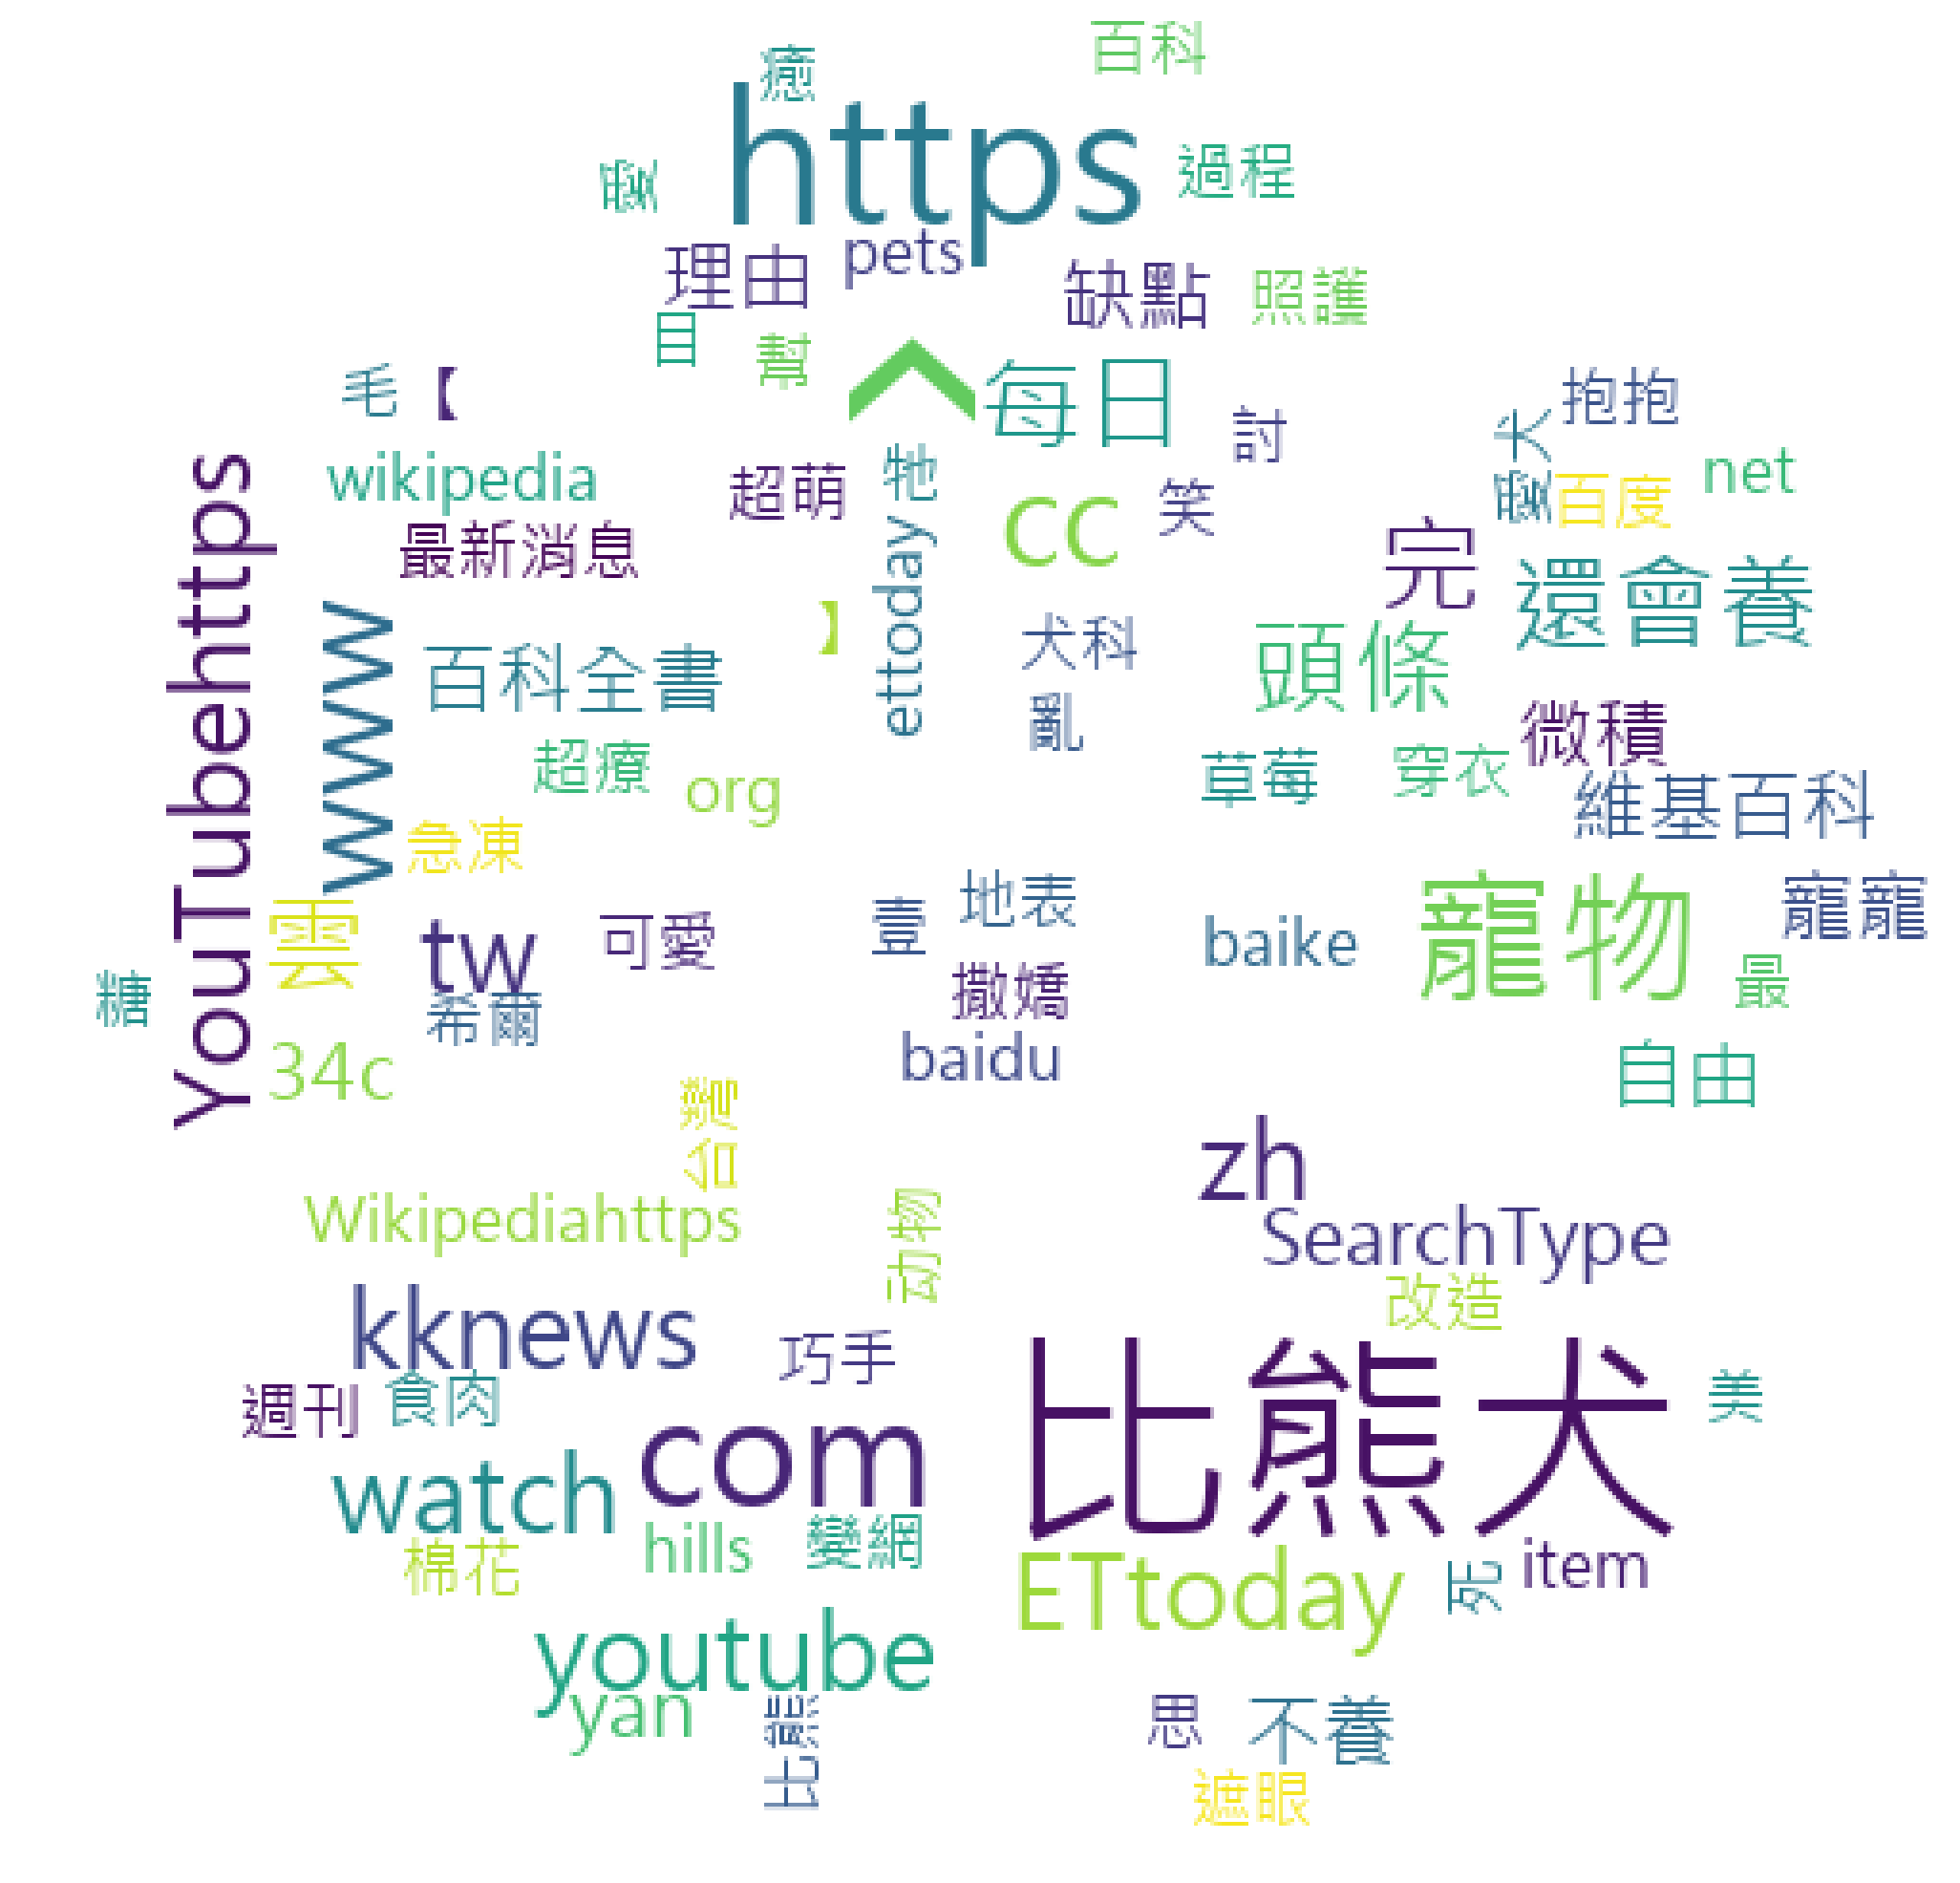

In [8]:

# NewsCloud3   文字雲結合google search

import requests
from bs4 import BeautifulSoup

# Google 搜尋 URL
google_url = 'https://www.google.com.tw/search'

# 查詢參數
my_params = {'q': '比熊'}

# 下載 Google 搜尋結果
r = requests.get(google_url, params = my_params)

# 確認是否下載成功
if r.status_code == requests.codes.ok:
  # 以 BeautifulSoup 解析 HTML 原始碼
  soup = BeautifulSoup(r.text, 'html.parser')

  # 觀察 HTML 原始碼
  #print(soup.prettify())

  # 以 CSS 的選擇器來抓取 Google 的搜尋結果
  items = soup.select('div.kCrYT > a[href^="/url"]')
 
  for i in items:
    # 標題
    print("標題：" + i.text)
    # 網址
    print("網址：" + i.get('href'))
#-----------------------------------------------

from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba
import numpy as np
from collections import Counter

#讀取文字檔資料
#text = open('news1.txt', "r",encoding="utf-8").read()  #讀文字資料

#讀取Google資料

text = ''
for i in items:
    # 標題
    text = text + i.text
print( text)

jieba.set_dictionary('dictionary/dict.txt.big.txt')
with open('dictionary/stopword.txt', 'r', encoding='utf-8-sig') as f:  #設定停用詞
#with open('dictionary/stopWord_cloudmod.txt', 'r', encoding='utf-8-sig') as f:  #設定停用詞
    stops = f.read().split('\n')   
terms = []  #儲存字詞
for t in jieba.cut(text, cut_all=False):  #拆解句子為字詞
    if t not in stops:  #不是停用詞
        terms.append(t)
diction = Counter(terms)
# 可列印詞的統計數量
#print(diction)

#font = "C:\\Windows\\Fonts\\simsun.ttc"  #設定字型(宋體)
font = "C:\\Windows\\Fonts\\msjh.ttc"  #設定字型(宋體)
#wordcloud = WordCloud(font_path="C:\\Windows\\Fonts\\simsun.ttc")

mask = np.array(Image.open("flower2.png"))  #設定文字雲形狀 
#wordcloud = WordCloud(font_path=font) 
wordcloud = WordCloud(background_color="white",mask=mask, font_path=font)  #背景顏色預設黑色,改為白色,字體為宋體
wordcloud.generate_from_frequencies(diction)  #產生文字雲

#產生圖片
plt.figure(figsize=(36,36))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

wordcloud.to_file("news_Wordcloud.png")  #存檔